In [1]:
import pandas as pd

# Load the file
df = pd.read_csv("Marital-satisfaction_Data (1).csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace('"', '')


In [2]:
# We focus on:
# - 'Marriage_years' → for grouping
# - 'Scale3'         → belief aging parents should live with children
# - 'Love1'          → marital satisfaction

df_q4 = df[['Marriage_years', 'Scale3', 'Love1']].dropna()
print(df_q4.head())

   Marriage_years  Scale3  Love1
0             2.0       1      1
1             3.0       1      1
2             7.0       2      1
3             7.0       1      1
4             9.0       3      1


In [3]:
# Group marriage duration
df_q4['Marriage_Duration_Group'] = pd.cut(df_q4['Marriage_years'], 
                                          bins=[0, 5, 15, 30, 100], 
                                          labels=['Short', 'Medium', 'Long', 'VeryLong'])

# Convert belief about aging parents (Scale3 is Likert: 1–7)
df_q4['Aging_Support_Belief'] = df_q4['Scale3'].apply(
    lambda x: 'Agree' if x <= 3 else 'Neutral' if x == 4 else 'Disagree'
)

# Convert marital satisfaction (Love1 is Likert: 1–7)
df_q4['Satisfaction_Level'] = df_q4['Love1'].apply(
    lambda x: 'High' if x >= 6 else 'Low' if x <= 3 else 'Medium'
)

# Preview
df_q4[['Marriage_Duration_Group', 'Aging_Support_Belief', 'Satisfaction_Level']].head()


,Marriage_Duration_Group,Aging_Support_Belief,Satisfaction_Level
0,Short,Agree,Low
1,Short,Agree,Low
2,Medium,Agree,Low
3,Medium,Agree,Low
4,Medium,Agree,Low


In [4]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert rows into transactions
transactions = df_q4[['Marriage_Duration_Group', 'Aging_Support_Belief', 'Satisfaction_Level']].astype(str).values.tolist()

# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()

,Agree,Disagree,High,Long,Low,Medium,Neutral,Short,VeryLong
0,True,False,False,False,True,False,False,True,False
1,True,False,False,False,True,False,False,True,False
2,True,False,False,False,True,True,False,False,False
3,True,False,False,False,True,True,False,False,False
4,True,False,False,False,True,True,False,False,False


In [5]:
# Find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Filter rules that predict marital satisfaction
satisfaction_rules = rules[rules['consequents'].astype(str).str.contains('Satisfaction_Level')]

# Show top rules
satisfaction_rules.sort_values(by='lift', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


Marriage Duration:
count    7178.000000
mean       14.760102
std        11.587541
min         0.080000
25%         5.000000
50%        12.000000
75%        23.000000
max        70.000000
Name: Marriage_years, dtype: float64

Belief About Aging Parents (Scale3):
Scale3
3    1561
2    1496
1     970
6     947
5     896
4     834
7     474
Name: count, dtype: int64

Marital Satisfaction (Love1):
Love1
1    4999
2    1526
3     415
4     137
5      99
6       2
Name: count, dtype: int64


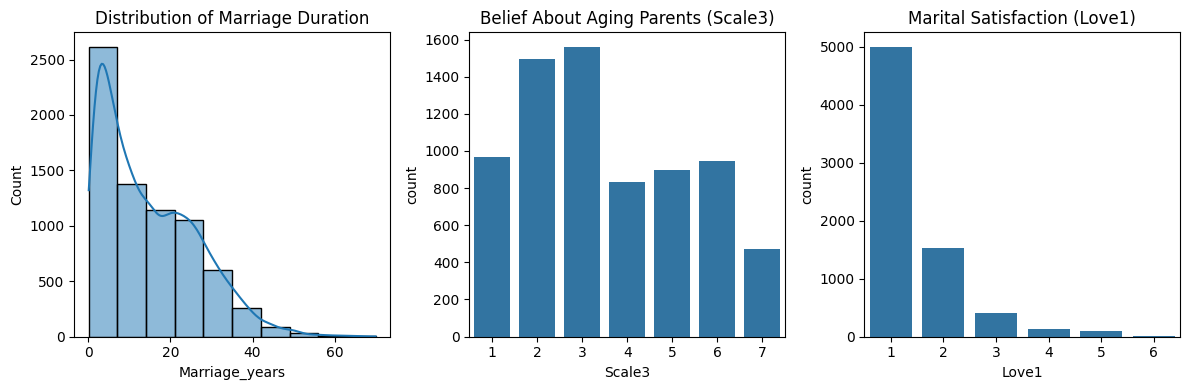

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Marital-satisfaction_Data (1).csv")
df.columns = df.columns.str.strip().str.replace('"', '')

# Focus columns
df_explore = df[['Marriage_years', 'Scale3', 'Love1']].dropna()

# Summary stats
print("Marriage Duration:")
print(df_explore['Marriage_years'].describe())

print("\nBelief About Aging Parents (Scale3):")
print(df_explore['Scale3'].value_counts())

print("\nMarital Satisfaction (Love1):")
print(df_explore['Love1'].value_counts())

# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_explore['Marriage_years'], bins=10, kde=True)
plt.title("Distribution of Marriage Duration")

plt.subplot(1, 3, 2)
sns.countplot(x='Scale3', data=df_explore)
plt.title("Belief About Aging Parents (Scale3)")

plt.subplot(1, 3, 3)
sns.countplot(x='Love1', data=df_explore)
plt.title("Marital Satisfaction (Love1)")

plt.tight_layout()
plt.show()


In [8]:
# Discretize marriage years
df_explore['Marriage_Duration_Group'] = pd.cut(df_explore['Marriage_years'], 
                                                bins=[0, 5, 15, 30, 100], 
                                                labels=['Short', 'Medium', 'Long', 'VeryLong'])

# Categorize Scale3 (aging parent support)
df_explore['Aging_Support'] = df_explore['Scale3'].apply(
    lambda x: 'Agree' if x <= 3 else 'Neutral' if x == 4 else 'Disagree'
)

# Categorize marital satisfaction
df_explore['Satisfaction'] = df_explore['Love1'].apply(
    lambda x: 'High' if x >= 6 else 'Low' if x <= 3 else 'Medium'
)

# Check transformed data
df_explore[['Marriage_Duration_Group', 'Aging_Support', 'Satisfaction']].head()


,Marriage_Duration_Group,Aging_Support,Satisfaction
0,Short,Agree,Low
1,Short,Agree,Low
2,Medium,Agree,Low
3,Medium,Agree,Low
4,Medium,Agree,Low


In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Create transactions
transactions = df_explore[['Marriage_Duration_Group', 'Aging_Support', 'Satisfaction']].astype(str).values.tolist()

# Transaction encoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Run Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Focus on satisfaction-related rules
satisfaction_rules = rules[rules['consequents'].astype(str).str.contains('Satisfaction')]
print("Association Rules related to Satisfaction:")
print(satisfaction_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10))


Association Rules related to Satisfaction:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [10]:
# Show sorted top rules
satisfaction_rules_sorted = satisfaction_rules.sort_values(by=['lift', 'confidence'], ascending=False)
print("Top interesting rules based on lift & confidence:")
print(satisfaction_rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Optional: Filter specific relationship
long_agree = satisfaction_rules_sorted[
    satisfaction_rules_sorted['antecedents'].astype(str).str.contains('Long') &
    satisfaction_rules_sorted['antecedents'].astype(str).str.contains('Agree')
]

print("\nRules where Long marriages + Aging support belief → Satisfaction:")
print(long_agree[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top interesting rules based on lift & confidence:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []

Rules where Long marriages + Aging support belief → Satisfaction:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []
